Random Forest Classifier - Bagging
Multiple Trees


In [2]:
#import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#step 1:read the dataset
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#step2:check data qualities
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
#check missing values
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
#Step 3:seperate x and y(Survived)
x = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y = df[['Survived']]

In [9]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x.value_counts()

Pclass  Sex     Age   SibSp  Parch  Fare     Embarked
3       male    17.0  0      0      8.6625   S           3
                19.0  0      0      7.8958   S           3
                32.0  0      0      7.9250   S           3
2       male    30.0  0      0      13.0000  S           3
                23.0  0      0      13.0000  S           3
                                                        ..
        female  31.0  1      1      26.2500  S           1
                32.0  0      0      13.0000  S           1
                32.5  0      0      13.0000  S           1
                33.0  0      2      26.0000  S           1
3       male    74.0  0      0      7.7750   S           1
Name: count, Length: 664, dtype: int64

In [12]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

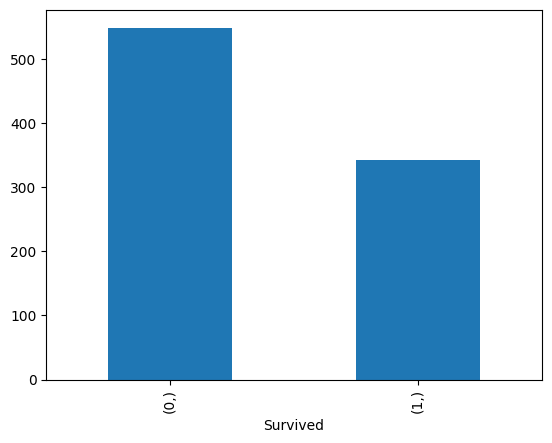

In [17]:
y.value_counts().plot(kind='bar')

In [18]:
#step 4:apply preprocessing on x
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [19]:
cat

['Sex', 'Embarked']

In [20]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [21]:
from sklearn.pipeline import Pipeline #automated preprocessing
from sklearn.impute import SimpleImputer #replacing missing value
from sklearn.preprocessing import StandardScaler,OneHotEncoder #preprocessing
from sklearn.compose import ColumnTransformer

In [22]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [26]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [27]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [28]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [29]:
#Step 5: Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [30]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [31]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [32]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [33]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [34]:
xtrain.shape #to check how many values are present

(712, 10)

In [35]:
xtest.shape

(179, 10)

In [36]:
#step 6:create random forest model building
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators==1,max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion='entropy')
model1.fit(xtrain,ytrain)

NameError: name 'n_estimators' is not defined

In [ ]:
model1.score(xtrain,ytrain)

In [ ]:
model1.score(xtest,ytest)

In [ ]:
#Step 7:tune the hyperparameter.....we tune parameter boz we dont know what value we have to take
params = {'n_estimators':[10,50]
    'max_depth':[1,2,3,4,5],
          'min_samples_split':[2,3,4,5,6,7],
          'min_samples_leaf':[5,6,7,8,9],
          'criterion':['gini','entropy']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc = Random